# Notebook 19: Eigenstuff and Principal Component Analysis
***

In this notebook, we will check out the link between eigenvalue/eigenvector decomposition (i.e., spectral decomposition) and principal component analysis as a means for reducing the dimensionality of a problem. In particular, we will examine the well-known *iris data set*, which contains information on sepal length, sepal width, petal length and petal width for three different types of iris flowers: Setosa, Versicolour, and Virginica. If your high school biology knowledge is a bit rusty, here's a diagram of some various parts of a flower:

<img width=400px src="https://live.staticflickr.com/3886/15099656846_1d80daa0b8_z.jpg">

We'll need numpy, Pandas and pyplot for this notebook, so let's load them, as well as the `datasets` package from scikit-learn, which will give us access to the iris data set.

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

<br>

### Exercise 1: Exploring the iris data set

First, let's load the iris data set from the `datasets` package. We can check the names and order of the four features using the aptly named attribute `feature_names`:

In [11]:
iris = datasets.load_iris()
print(iris.feature_names)
print(dir(iris))
print(iris)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 

Make a few scatter plots to explore the potential relationships between the four different features (without separating the three types of iris). Are there any features that appear to be strongly linearly related to one another? Based on your knowledge of what each feature represents, for what physical reason might these correlations exist?

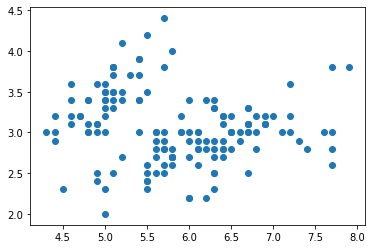

In [9]:
plt.scatter(iris.data[:,0], iris.data[:,1])

We can use the `seaborn` package's `pairplot` method to generate scatter plots of all pairs of the features to more easily visualize this. Note that the alias `sns` for the `seaborn` package is a shout-out to [Rob Lowe's character, Samuel Norman Seaborn](https://en.wikipedia.org/wiki/Sam_Seaborn), on *The West Wing*. Don't say we never taught you anything cool!

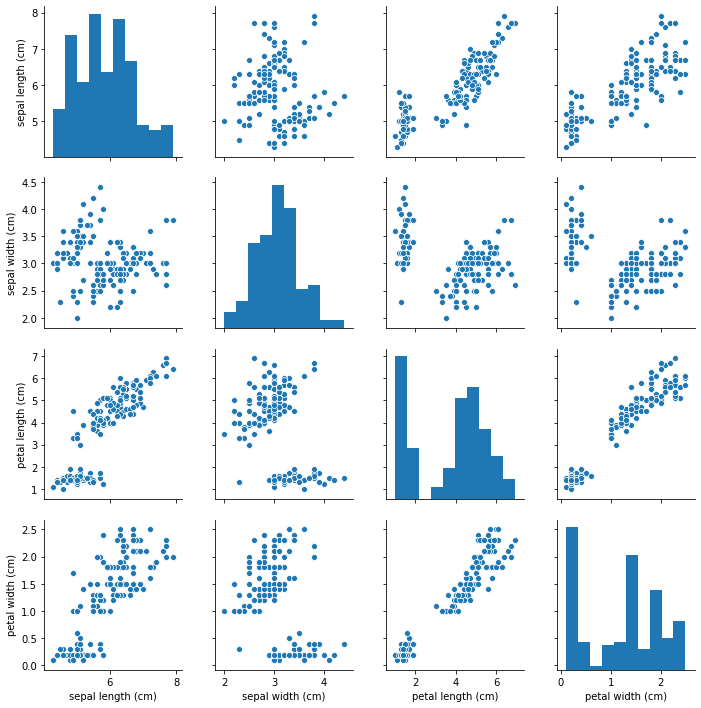

In [24]:
# import the seaborn package
import seaborn as sns

# convert our iris data set into a Pandas dataframe
dfI = pd.DataFrame(iris.data)

# rename the columns to their appropriate feature names
dfI.rename({0 : iris.feature_names[0], 1 : iris.feature_names[1], 2 : iris.feature_names[2], 3: iris.feature_names[3]}, inplace=True, axis=1)

# generate the pairs plot
g = sns.pairplot(dfI)

It looks like petal length and petal width are strongly linearly related to one another. Petal length and sepal length might be too. But good golly it sure would be nice if we had an *algorithmic* way to quantify how related they were, and choose only the important dimensions!

<br>

### Exercise 2: An algorithmic way to quantify how related dimensions are, and choose only the important ones

Let's go through each of the steps from the lecture slides for performing a principal components analysis decomposition for the iris data set.

**Step 1:** Construct $MM^T$ or $M^T M$, whichever is smaller, where $M$ is the data matrix.

**Solution:**

The iris data set is 150x4, so $M^TM$ will be smaller.

In [28]:
M = iris.data

print(np.matmul(M, M.T).shape)
print(np.matmul(M.T, M).shape)

MTM = np.matmul(M.T, M) 
MMT = np.matmul(M, M.T)

(150, 150)
(4, 4)


**Step 2:** Compute the eigenvalues and eigenvectors of $MM^T$ or $M^T M$ (whichever is smaller). Reminder: `np.linalg.eig` can be useful for this.

In [38]:
# unsorted
eig_val, eig_vec = np.linalg.eig(MTM)
print(eig_val, eig_vec)

print(np.flip(np.sort(eig_val)))
i = np.flip(np.argsort(eig_val))

# sorted
eig_val, eig_vec = np.linalg.eigh(MTM)
sorted_eval = np.flip(np.sort(eig_val))

print(sorted_eval)
print(eig_vec)

[9.20830507e+03 3.15454317e+02 1.19780429e+01 3.55257020e+00] [[ 0.75110816  0.2841749   0.50215472  0.32081425]
 [ 0.38008617  0.5467445  -0.67524332 -0.31725607]
 [ 0.51300886 -0.70866455 -0.05916621 -0.48074507]
 [ 0.16790754 -0.34367081 -0.53701625  0.75187165]]
[9.20830507e+03 3.15454317e+02 1.19780429e+01 3.55257020e+00]
[9.20830507e+03 3.15454317e+02 1.19780429e+01 3.55257020e+00]
[[ 0.32081425  0.50215472  0.2841749  -0.75110816]
 [-0.31725607 -0.67524332  0.5467445  -0.38008617]
 [-0.48074507 -0.05916621 -0.70866455 -0.51300886]
 [ 0.75187165 -0.53701625 -0.34367081 -0.16790754]]


**Step 3:** Construct the matrix $E$, whose columns are made up of the eigenvectors in order of decreasing strength of their corresponding eigenvalues.

In [ ]:
evals_sorted = ## TO DO
# Get the sorted list of indices for the eigenvalues
idx_sorted = ## TO DO
E = ## TO DO
print(E)

**Step 4:** Rotate our original data points, $M$, into the principal components frame of reference by multiplying on the right by $E$.

In [ ]:
# SOLUTION:

ME = ##ROTATE!
print("Original data:")
print(M[:10,:]) # print the first few original data points
print("Rotated data:")
print(np.round(ME[:10,:],4)) # print the first few rotated data points

**Step 5:** To get a reduced dimension representation of our data in $M$, take only the eigenvectors associated with the $k$ largest eigenvalues. Here, let's use $k=2$ since from our pairs plot it seems like that's a reasonable place to start. So we take the eigenvectors associated with the $k$ largest eigenvalues and...
* put them in a narrower matrix, $E_k$, then
* $ME_k$ is a reduced-dimension representation of $M$, in the directions of the most important eigenvectors.

In [ ]:
# SOLUTION:

ME2=## TO DO

**Bonus step:** We can check on the quality of our reduced dimension representation by rotating the coordinates back into their original system. Since the matrix $E$ rotates into the PCA system, the matrix $E^{-1}$ rotates back into the original coordinate system. Compute the $L_2$ error between the original data matrix $M$ and the rotated-reduced-reotated-back matrix for each of $k=1,2,3$. The errors should be decreasing as we add in more components, but we want to find out how many components we really need in order for the error to be acceptably low. In this way, we can pick how many dimensions to keep.

*Note: It might be easiest to do the rotation back into the original coordinates by padding the rotated matrix with 0s in the non-principal components.*

In [ ]:
# SOLUTION:

Einv = np.linalg.inv(E)  ## save E inverse
errs = [] #intialize
for k in range(1,4):
    Ek = E.copy()
    ## TO DO
    errs.append(##find error of first k prinical components
    
print(errs)